<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* Part 6.1: Using Convolutional Neural Networks
* Part 6.2: Using Pretrained Neural Networks with Keras
* **Part 6.3: Facial Recognition and Analysis**


### **---WARNING---WARNING---WARNING---WARNING---**

You will **_not_** be able to run all of the Examples and **Exercises** in this lesson unless you change your Runtime type to a GPU or a TPU. You will receive an error if you try to use the CPU. The `L4 GPU` is perfectly fine for this lesson and it is available to Colab users who are using it for free or have a paid subscription. You should change your runtime *now* before you start this lesson.

### Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CODE CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False


Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


# **Part 6.3: Facial Recognition and Analysis**


The history of facial recognition using cascaded convolutional networks (CNNs) is quite fascinating and has evolved significantly over the years. Here's a brief overview:

**Early Developments**
* **Viola-Jones Algorithm (2001):** The Viola-Jones algorithm was one of the earliest and most influential methods for real-time face detection. It used Haar-like features and a cascade of classifiers trained with AdaBoost to detect faces quickly and accurately.

**Introduction of CNNs**
* **Convolutional Neural Networks (CNNs):** In the early 2010s, the introduction of CNNs revolutionized facial recognition technology. CNNs could learn complex features directly from data, making them more robust to variations in pose, expression, and lighting.

**Cascaded CNNs**
* **Cascade Architecture:** To improve performance and efficiency, researchers developed cascaded CNN architectures. These architectures use multiple stages of CNNs, where each stage refines the results of the previous one. This approach helps in quickly rejecting non-face regions and focusing on challenging candidates.

**MTCNN (2016)**
* **Multitask Cascaded Convolutional Networks (MTCNN):** MTCNN is a notable example of a cascaded CNN architecture designed for face detection and alignment. It consists of three stages: PNet (Proposal Network), RNet (Refine Network), and ONet (Output Network)4. MTCNN can detect faces and facial landmarks with high accuracy and efficiency.


## **MTCNN (Multitask Cascaded Convolutional Networks)**

The **MTCNN (Multitask Cascaded Convolutional Networks)** package is a robust face detection and alignment library implemented for Python (≥ 3.10) and TensorFlow (≥ 2.12). It is designed to detect faces and their landmarks using a multitask cascaded convolutional network. Here are some key features:

1. **Face Detection:** MTCNN uses a cascade of three networks (PNet, RNet, and ONet) to detect faces. PNet scans the image and proposes candidate face regions, RNet refines these proposals, and ONet detects facial landmarks and provides final refinement2.
2. **Facial Landmark Detection:** It can detect key facial landmarks such as eyes, nose, and mouth.
3. **Batch Processing:** Supports processing multiple images at once.
4. **Performance:** Optimized for faster execution by avoiding unnecessary operations.

### Run the next cell to install MTCNN

The software package `mtcnn` is not part of the standard Colab library, so we need to install it ourselves by running the next code cell.

In [2]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.8 MB/s eta 0:00:00


If the code is correct, you should see something like the following:

~~~text
Collecting mtcnn
  Downloading mtcnn-1.0.0-py3-none-any.whl.metadata (5.8 kB)
Requirement already satisfied: joblib>=1.4.2 in /usr/local/lib/python3.10/dist-packages (from mtcnn) (1.4.2)
Collecting lz4>=4.3.3 (from mtcnn)
  Downloading lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.7 kB)
Downloading mtcnn-1.0.0-py3-none-any.whl (1.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00
Downloading lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00
Installing collected packages: lz4, mtcnn
Successfully installed lz4-4.3.3 mtcnn-1.0.0
~~~

### Download Images for Class_06_3

The code in the cell below creates a custom function for this lesson called `store_image()` that uses `urllib.request()`.

`urllib.request()` is a module in Python's standard library used for opening and reading URLs. It's part of the larger urllib package, which handles URL operations like fetching data across the web.

The cell then reads several image files from the course file server that we will use in this lesson.


In [3]:
# Download images

import urllib.request

# Function to download and store images
def store_image(url, local_file_name):
  with urllib.request.urlopen(url) as resource:
    with open(local_file_name, 'wb') as f:
      f.write(resource.read())

# Images used in this lesson
store_image('https://biologicslab.co/BIO1173/images/class_06/ChineseAngry.jpg','ChineseAngry.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TaylorSwift1.jpg','Taylor1.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TaylorSwift2.jpg','Taylor2.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TaylorSwift3.jpg','Taylor3.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TaylorDisgust.jpg','TaylorDisgust.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TaylorDisgust2.jpg','TaylorDisgust2.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TravisKelce1.jpg','Travis1.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TravisKelce2.jpg','Travis2.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TravisKelce3.jpg','Travis3.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TaylorTravis.jpg','TaylorTravis.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TaylorGroup.jpg','TaylorGroup.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/TaylorEighmy.jpg','TaylorEighmy.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/WomanGorilla.jpg','WomanGorilla.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/ET.jpg','ET.jpg')
store_image('https://biologicslab.co/BIO1173/images/class_06/SheldonSmile.jpg','SheldonSmile.jpg')

### **Create Custom Function `face_detector()`**

The code in the cell below createss a function called `face_detector()` using the MTCNN library to detect faces in images. Here’s a breakdown of what each part does:

1. **Imports the necessary libraries:**
   - *matplotlib.pyplot* for displaying images.
   - *MTCNN* from the mtcnn package for face detection.
   - *cv2* from OpenCV for image processing.

2. **Initializes the MTCNN face detector.**

3. **Defines the detect_and_display function:**

  - **Loads the image:** Reads the image from the specified path and converts it from BGR (OpenCV default) to RGB.
  -**Resizes the image:** Resizes the image to a fixed size of 640x480 pixels.
  -**Detects faces:** Uses the MTCNN detector to find faces in the resized image.
4. **Displays the image and draws bounding boxes around detected faces:**
  - Displays the image using plt.imshow.
  - For each detected face, draws a red rectangle around it using the coordinates from face['box'].
5. **Prints face details**

In [4]:
# Create face_detector() function

from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
import cv2

# Initialize the MTCNN face detector
detector = MTCNN()

def face_detector(image_path):
    # Load the image
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    # Resize the image to a fixed size (e.g., 640x480)
    resized_image = cv2.resize(image, (640, 480))

    # Detect faces in the resized image
    faces = detector.detect_faces(resized_image)

    # Display the image and draw bounding boxes for detected faces
    plt.imshow(resized_image)
    for face in faces:
        x, y, width, height = face['box']
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none'))
    plt.axis('off')
    plt.show()

    # Print face details
    for face in faces:
        print(face)


This code defines a function called `face_detector()` that detects faces in an image and displays the image with bounding boxes around the detected faces. Here's a step-by-step breakdown:

1. **Import Libraries**:
   - `matplotlib.pyplot` for displaying images.
   - `MTCNN` from the `mtcnn` library for face detection.
   - `cv2` from OpenCV for image processing.

2. **Initialize the Face Detector**:
   - `detector = MTCNN()` initializes the MTCNN face detector.

3. **Define the `face_detector()` Function**:
   - **Load the Image**:
     - `image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)` reads the image from the specified path and converts it from BGR to RGB color space.
   - **Resize the Image**:
     - `resized_image = cv2.resize(image, (640, 480))` resizes the image to 640x480 pixels.
   - **Detect Faces**:
     - `faces = detector.detect_faces(resized_image)` detects faces in the resized image.
   - **Display the Image with Bounding Boxes**:
     - `plt.imshow(resized_image)` displays the resized image.
     - A loop iterates over the detected faces, drawing a red rectangle around each face using `plt.Rectangle()`.
     - `plt.axis('off')` hides the axis for a cleaner display.
     - `plt.show()` displays the image with the bounding boxes.
   - **Print Face Details**:
     - Another loop prints the details of each detected face, such as the bounding box coordinates and possibly other attributes like confidence scores.

This function helps visualize the detected faces in an image and provides details about each detected face. If you have any more questions or need further assistance, feel free to ask!


### Example 1A: Detect Face

Let's start by giving our `face_detector()` an easy image to analyse--a close-up portrait of Taylor Swift.

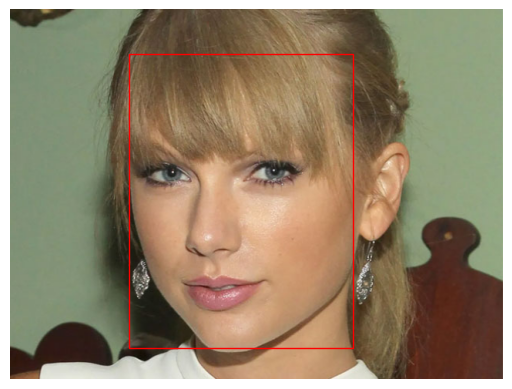

{'box': [154, 57, 291, 382], 'confidence': 0.9988125562667847, 'keypoints': {'nose': [249, 302], 'mouth_right': [325, 354], 'right_eye': [336, 212], 'left_eye': [206, 213], 'mouth_left': [228, 354]}}


In [5]:
# Example 1: Detect and Display Image

# Define image path
IMAGE_PATH = 'Taylor1.jpg'

face_detector(IMAGE_PATH)

If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image01.png)

Our `face_detector()` function had no trouble seeing Taylor Swift's face and putting a red "bounding box" around it. Here are the coordinates for the "box":

~~~text
'box': [154, 57, 291, 382],
~~~

And our `face_detector()` was very confident that it had correctly recognized a face:

~~~text
'confidence': 0.9988125562667847,
~~~

### Example 1B: Detect Face

Does our `face_detector()` function work as well with a male face? Let's see how our function works with another person with the same first name `Taylor`, Taylor Eighmy -- The President of The University of Texas at San Antonio?

The code in the cell below uses the function `face_detector()` to analyze an image of Taylor Eighmy (`TaylorEighmy.jpg`).

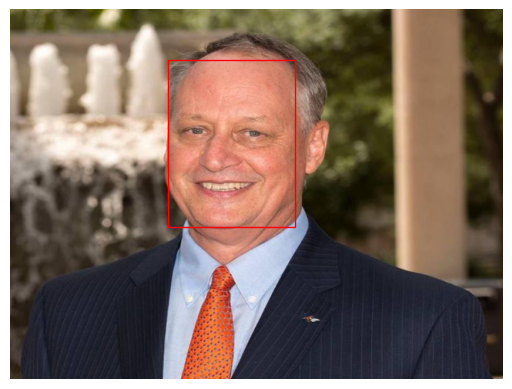

{'box': [205, 65, 165, 217], 'confidence': 0.9995055198669434, 'keypoints': {'nose': [266, 202], 'mouth_right': [318, 227], 'right_eye': [317, 161], 'left_eye': [243, 158], 'mouth_left': [238, 223]}}


In [6]:
# Example 1B: Detect Face

# Define image path
IMAGE_PATH = 'TaylorEighmy.jpg'

face_detector(IMAGE_PATH)

If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image05.png)

Our `face_detector()` again has no trouble "seeing"  a face in the image.

Here are the coordinates for the "box" the function placed around President Eighmy's face:

~~~text
'box': [204, 64, 167, 217]
~~~

Again, the confidence level of our `face_detector()` function is extremely high:

~~~text
confidence': 0.999735414981842
~~~


### **Exercise 1A: Detect Face**

So far, we have only used images that contained a portrait of a person. Can our face detector find the face in an image of the whole person?

In the cell below, use the function `face_detect()` to analyze an image of Taylor Swift where she is standing outside (`Taylor2.jpg`).

In [ ]:
# Insert your code for Exercise 1A here



If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image04.png)

Our `face_detector()` function can clearly detect a face from a image showing most of a person in a somewhat cluttered environment.

### **Exercise 1B: Detect Face**

An interesting question is "How specific is our `face_detector()` function?"

For example, can it tell the difference between a human face and the face of a non-human primate like a baby gorilla?

In the cell below, use the function `face_detector()` to analyze an image of a Woman holding a baby gorilla (`WomanGorilla.jpg`).

In [ ]:
# Insert your code for Exercise 1B here



If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image06.png)

Our `face_detector()` function found both the face of the woman and the face of the baby gorilla. However, it should be noted that our function was somewhat less  certain about the baby gorilla (confidence': 0.9592615365982056) than it was for the woman's face (confidence': 0.9990089535713196).

### **Exercise 1C: Detect Face**

What about a face that is clearly not human, but has some human-like features?

In the cell below, use the function `face_detector()` to analyze an image of .**ET**, the Extra-Terrestrial, from the 1982 science fiction film directed by Steven Spielberg (`ET.jpg`).

In [ ]:
# Insert your code for Exercise 1C here



If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image03.png)

Since there is no bounding box, and no printout, our `face_detector()` function didn't find any face when "looking" at ET's picture. So clearly there are limits to what is detected as a human face.

### **Exercise 1D: Detect Faces**

One final question we might want to ask is how good is our `face_detector()` function at identifying multiple faces of a group of people in a "normal" picture--a picture that you might take will your cell phone?

In the cell below, use `face_detector()` to analyze an image of Taylor Swift, Travis Kelse and a third person in the image `TaylorTravis.jpg`).

In [ ]:
# Insert your code for Exercise 1D here



If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image07.png)

Even though Taylor Swift isn't looking straight into the camera, our `face_detector()` function had no problem "seeing" her face along with the faces of the other two men in the picture.

# **VGG16 Model**

The **VGG16 model** is a convolutional neural network (CNN) architecture developed by the Visual Geometry Group (VGG) at the University of Oxford. It's widely used for image classification tasks. Here are some key points about VGG16:

**Architecture**
* **16 Layers:** The model has 16 layers with weights, including 13 convolutional layers and 3 fully connected layers.
* **3x3 Filters:** It uses small 3x3 convolution filters throughout the network.
* **Max Pooling:** It includes max pooling layers to reduce the spatial dimensions of the feature maps.
* **Fully Connected Layers:** The final layers are fully connected, followed by a softmax activation function for classification.

**Pre-trained Weights**
* **ImageNet Pre-training:** The VGG16 model is often pre-trained on the ImageNet dataset, which contains over a million images across 1,000 categories.
* **Transfer Learning:** This pre-trained model can be fine-tuned for specific tasks, making it a popular choice for transfer learning.

**Applications***
* **Image Classification:** VGG16 is used for classifying images into different categories, such as identifying objects, animals, or plants in images.
* **Feature Extraction:** It can be used to extract features from images, which can then be used for other machine learning tasks1.

In order to use the VGG16 model, we need to create the 2 following functions.

### **Create Function `load_image()`**

The `load_image()` function is designed to load an image from a file, preprocess it, and prepare it for input into a neural network model.

#### **Explanation of load_image Function:**
1. **Load the Image:** The function uses the PIL library to open the image file specified by the filename and ensures that the image is in RGB format, which is essential for consistent processing.
2. **Resize the Image:** It resizes the image to 224x224 pixels, which is the input size expected by many neural network models, like VGG16.
3. **Convert Image to Numpy Array:** The function converts the image into a NumPy array, a common format used for numerical computations in machine learning.
4. **Expand Dimensions:** It adds an extra dimension to the image array to match the expected input shape for the neural network. This extra dimension represents the batch size.
5. **Preprocess the Image:** The function applies model-specific preprocessing to the image array. This step might normalize the pixel values to a range suitable for the neural network model.
6. **Return the Preprocessed Image:** Finally, the function returns the preprocessed image array, ready to be used as input for the neural network model.

In [7]:
# Create function load_image()

from PIL import Image
import numpy as np

# Load and preprocess the image
def load_image(filename):
    img = Image.open(filename).convert('RGB')  # Ensure image is in RGB format
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

### **Create Function `predict_image()`**

The code in the cell below creates a function called `predict_image()`. Here is a step-by-step explanation of this function:

1. **Input Parameter:**
* **img_array:** This is the input image array that you want to classify. It should be preprocessed and in the format expected by the VGG16 model.

2. **Model Prediction:**
* **preds = model_VGG16.predict(img_array):** This line uses the predict method of the model_VGG16 (a pre-trained VGG16 model) to make predictions on the input image array. The predict method returns a list of probabilities for each of the classes in the dataset.

3, **Decode Predictions:**

* **return decode_predictions(preds, top=5)[0]:** This line decodes the predicted probabilities into human-readable class names and probabilities. The decode_predictions function takes the following parameters:
  - **preds:** The list of predicted probabilities returned by the model.
  - **top=5:** This parameter specifies that we want the top 5 predictions.

* The [0] at the end selects the top 5 predictions for the first image in the input array (assuming img_array could contain multiple images).

In [8]:
# Create function predict_image()

from PIL import Image
import numpy as np

# Predict the image
def predict_image(img_array):
    preds = model_VGG16.predict(img_array)
    return decode_predictions(preds, top=5)[0]

### Example 2: Analyze Non-Facial Content

The code in the cell below uses our 2 new functions `load_image()` and `predict_image()` to analyze the same picture of Taylor Swift that you used above in **Exercise 1A**. The VGG16 model is _not_ trained to find faces, but to analyze everything else it "sees" in the image.

In [ ]:
# Example 2: Analyze Non-Facial Content

from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

# Define Image path
IMAGE_PATH = "Taylor2.jpg"

# Load the VGG16 model
model_VGG16 = VGG16(weights='imagenet', include_top=True)

# Load image
img_path = IMAGE_PATH
img_array = load_image(img_path)

# Make predictions
predictions = predict_image(img_array)

# Display the image and predictions
plt.imshow(Image.open(img_path))
plt.axis('off')
plt.show()

for pred in predictions:
    print(f"{pred[1]}: {pred[2]*100:.2f}%")


If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image10.png)

### **Analysis of the output**

Let's take a closer look at the output since it gives us some insight into how the **VGG16** neural network extracts features and classifies them.

#### **Downloaded Files**

First, at the top of the output, you can see that the code downloaded two files from the Internet, (1) `vgg16_weights_tf_dim_ordering_tf_kernels.h5` and (2) `imagenet_class_index.json`.  

1. The file `vgg16_weights_tf_dim_ordering_tf_kernels.h5` is a pre-trained weight file for the VGG16 model. Here's a breakdown of what the file name means:
  - **vgg16_weights:** Indicates that it contains the weights for the VGG16 model.
  - **tf_dim_ordering_tf_kernels:** Specifies that the weights are ordered for TensorFlow (tf) and use TensorFlow kernels.
  - **h5:** The file format, which is HDF5, a data model, library, and file format for storing large and complex data.

>This file can be used to load the pre-trained VGG16 model in TensorFlow or Keras, allowing you to leverage the model's learned features for your own image classification tasks without having to train it from scratch.

2. The `imagenet_class_index.json` file is a **JSON file** that contains a mapping of ImageNet class indices to human-readable class names. ImageNet is a large visual database designed for use in visual object recognition research, and it contains millions of images categorized into thousands of different classes.

#### **Image Analysis**

By "looking" at the image of Taylor Swift, the **VGG16 model** correctly identifies that image contained a pair of jeans (jean: 70.75%), but since the image did not include a full view of her legs, the model thought there was a 7% chance that it "saw" a miniskirt (miniskirt: 6.84%).

The model was unsure if it "saw" Taylor wearing a `cardigan` sweater or a sweatshirt. The VGG16 model didn't get either item exactly right, but Taylor wasn't really wearing her sweater in a typical manner either.

Finally, Taylor Swift's heavy eye make-up made it appear to the model, that there was a small chance of a pair of sunglasses (sunglasses: 1.82%).

### **Exercise 2: Analyze Non-Facial Content**

In the cell below, use the VGG16 model to make predictions about the contents of an image of Kelse Travis in a football uniform (`Travis2.jpg`).

In [ ]:
# Insert your code for Exercise 2 here





If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image09.png)

Again the output is interesting. The VGG16 model correctly identifies that image contained a football helmet (`football_helmet: 57.98%`) even though only a small part (the face mask) is actually visible in the image. Somewhat bizarrely, the model thought it "saw" Kelse wearing a "basketball uniform" (basketball: 29.98%).

## **Face Extraction from Image**

**Face extraction** in Convolutional Neural Networks (CNNs) refers to the process of detecting and isolating faces from an image before feeding them into a CNN for further processing, such as recognition or classification. This step is crucial because it ensures that the CNN focuses only on the relevant part of the image (the face) and ignores the background or other irrelevant detail.

### **Create Function `extract_face_from_image()`**

The code in the cell below, creates a function called `extract_face_from_image()`. The function uses the MTCNN neural network to extract facial image(s) from a larger image and then returns the extracted face as an image to the program that called the function.

In [10]:
# Create function extract_face_from_image()

from numpy import asarray
from PIL import Image


def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
  image = plt.imread(image_path)
  detector = MTCNN()
  faces = detector.detect_faces(image)

  face_images = []

  for face in faces:
    # extract the bounding box from the requested face
    x1, y1, width, height = face['box']
    x2, y2 = x1 + width, y1 + height

    # extract the face
    face_boundary = image[y1:y2, x1:x2]

    # resize pixels to the model size
    face_image = Image.fromarray(face_boundary)
    face_image = face_image.resize(required_size)
    face_array = asarray(face_image)
    face_images.append(face_array)

  return face_images

### Example 3: Extract Face from Image

The code in the cell below, uses our function `extract_face_from_image()` to extract Taylor Swift's face from the image of her used above in Example 2.

![__](https://biologicslab.co/BIO1173/images/class_06/TaylorSwift2.jpg)

In [ ]:
# Example 3: Extract face

# Define Image path
IMAGE_PATH = "Taylor2.jpg"

extracted_face = extract_face_from_image(IMAGE_PATH)

# Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image11.png)

Our `extract_face_from_image()` function had no trouble with this image.

### **Exercise 3: Extract Face from Image**

In the cell below, use our custom function `extract_face_from_image()` to extract Kelse Travis' face from the image of him standing in his football uniform (`Travis2.jpg`) that was used above in **Exercise 2**.

![__](https://biologicslab.co/BIO1173/images/class_06/TravisKelce2.jpg)

In [ ]:
# Insert your code for Exercise 3 here



If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image12.png)

It is noteworthy, that our `extract_face_from_image()` didn't include Kelsey's beard.

## **CNNs to Automatically Blur Faces in Images**

Automatically **blurring faces** in images is important for several reasons, especially when it comes to privacy, security, and ethical considerations:

#### **Privacy Protection**
* **Personal Privacy:** Blurring faces helps protect individuals' privacy by making them less recognizable in images. This is crucial in situations where individuals have not given their consent to be photographed or identified.
* **Data Privacy Regulations:** Regulations like the General Data Protection Regulation (GDPR) in the EU emphasize the importance of protecting personal data. Automatically blurring faces ensures compliance with these regulations.

#### **Security Concerns**
* **Anonymity:** In sensitive contexts, such as protests or political gatherings, blurring faces can protect individuals from potential repercussions or surveillance.
* **Witness Protection:** In law enforcement and legal contexts, blurring faces of witnesses and victims can protect their identities and ensure their safety.

#### **Ethical Considerations**
* **Consent:** It is ethically responsible to blur faces when sharing images of people who haven't explicitly consented to be photographed or identified. This is especially important in public places or when dealing with vulnerable populations, such as children.
* **Minimizing Harm:** By blurring faces, content creators and organizations can minimize the potential harm that could come from individuals being identified without their permission.

#### **Public Sharing and Media**
* **Social Media:** Automatically blurring faces is particularly important for images shared on social media, where privacy settings might not be strict, and images can spread quickly.
* **News and Journalism:** In journalism, blurring faces can protect the identities of individuals in sensitive or dangerous situations while still conveying important information.

#### **Example Use Cases**
* **CCTV Footage:** Automatically blurring faces in CCTV footage can help maintain the privacy of individuals who are not involved in any incidents being monitored.
* **Photo Albums:** Photo-sharing platforms can use face blurring to respect the privacy of people in group photos before these images are made public.

Before we can use the `face_recognition` package, we will need to install it first.

### **Install `face_recognition` package**

The **face_recognition package** is a simple and easy-to-use facial recognition library for Python. It is built on top of **`dlib`** and **`OpenCV`**, leveraging `dlib's` state-of-the-art face recognition capabilities. Here are some key features and uses of the face_recognition package:

#### **Key Features:**
* **Face Detection:** It can detect faces in images and videos.
* **Face Landmarks:** It can find and manipulate facial features such as eyes, nose, mouth, and chin.
* **Face Encoding:** It can generate face encodings, which are numerical representations of faces that can be used for recognition.
* **Face Recognition:** It can recognize and compare faces in images.
* **Command-Line Tool:** It includes a simple command-line tool for performing face recognition on folders of images.

#### **Typical Uses:**
* **Photo Organization:** Automatically organizing photos by recognizing and grouping images of the same person.
* **Security Systems:** Implementing access control systems that use facial recognition to grant or deny access.
* **Social Media:** Identifying and tagging friends in photos.
* **Real-Time Applications:** Building real-time face recognition systems for various applications.

Run the next cell to install the `face_recognition` software package.

In [ ]:
!pip install face_recognition


If the code is correct, you should see the following output:

~~~text
Collecting face_recognition
  Downloading face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
Collecting face-recognition-models>=0.3.0 (from face_recognition)
  Downloading face_recognition_models-0.3.0.tar.gz (100.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Requirement already satisfied: Click>=6.0 in /usr/local/lib/python3.10/dist-packages (from face_recognition) (8.1.7)
Requirement already satisfied: dlib>=19.7 in /usr/local/lib/python3.10/dist-packages (from face_recognition) (19.24.2)
Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from face_recognition) (1.26.4)
Requirement already satisfied: Pillow in /usr/local/lib/python3.10/dist-packages (from face_recognition) (10.4.0)
Downloading face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
Building wheels for collected packages: face-recognition-models
  Building wheel for face-recognition-models (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=e4a2f3be70edc7779cb26510e9aeaa38290a0919ac05ed77bfe4d933cf4b60c1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
Installing collected packages: face-recognition-models, face_recognition
Successfully installed face-recognition-models-0.3.0 face_recognition-1.3.0
~~~

### Example 4: Blur Faces in an Image

Let's see what we can do with the `face_recognition` package. One practical function is to automatically find faces in an image and blur it.

The code in the cell below uses the same image you used in **Exercise 1D** above.

![__](https://biologicslab.co/BIO1173/images/class_06/TaylorTravis.jpg)



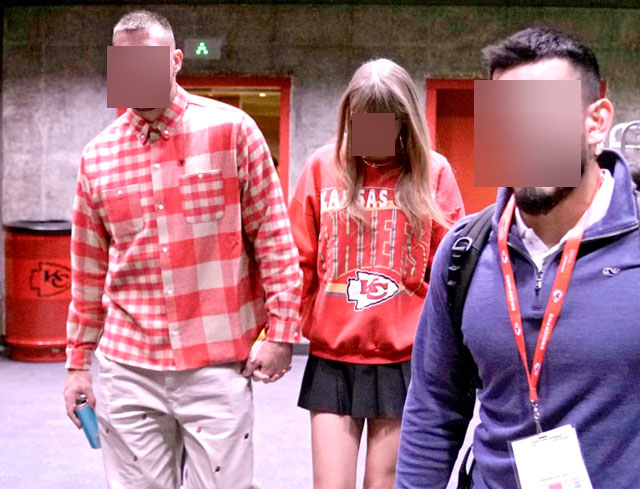

In [13]:
# Example 4: Blur Faces

import face_recognition
import cv2
from google.colab.patches import cv2_imshow

# Path to group image
GROUP_PHOTO = "TaylorTravis.jpg"

# Load the image
image = face_recognition.load_image_file(GROUP_PHOTO)

# Find all face locations
face_locations = face_recognition.face_locations(image)

# Blur faces
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
for (top, right, bottom, left) in face_locations:
    face = image[top:bottom, left:right]
    blurred_face = cv2.GaussianBlur(face, (99, 99), 30)
    image[top:bottom, left:right] = blurred_face

# Display the image with blurred faces
cv2_imshow(image)


If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image15.png)

The code worked as expected.

### **Exercise 4: Blur Faces**

In the cell below, finds faces and blur them in a group image called `TaylorGroup.jpg`.


![__](https://biologicslab.co/BIO1173/images/class_06/TaylorGroup.jpg)



In [ ]:
# Insert your code for Exercise 4 here




If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image16.png)

## **Facial Analysis**

Besides finding and blurring faces, the `facial_recognition` package can also be used to find facial features by identifying and returning the locations of facial landmarks such as eyes, nose, mouth, and chin.

In order to utilize this capability, we need to create a new function called `analyze_facial_attribute()` in the cell below.

### **Create Function `analyze_facial_attributes()`**

#### Explanation of the `analyze_facial_attributes` function:

1. **Load the Image**: The function uses the `face_recognition` library to load an image from the specified file path.
2. **Find Face Locations**: It detects all face locations in the image and stores the coordinates of these faces.
3. **Find Facial Features**: The function identifies various facial features (landmarks) like eyes, nose, and mouth for each detected face.
4. **Display the Image**: It uses the `PIL` library to open and display the image with `matplotlib`, turning off axis labels for a cleaner view.
5. **Plot Facial Features**: For each set of facial features, it plots the points using `matplotlib`, connecting the landmarks with lines to visualize the features.
6. **Show Image with Landmarks**: The function displays the image with the overlaid facial landmarks.
7. **Return Results**: Finally, it returns the face locations and facial landmarks.


In [14]:
# Create function analyze_facial_attributes()

import face_recognition
import matplotlib.pyplot as plt
from PIL import Image

def analyze_facial_attributes(image_path):
    # Load the image
    image = face_recognition.load_image_file(image_path)

    # Find all face locations in the image
    face_locations = face_recognition.face_locations(image)

    # Find all facial features in the image
    face_landmarks_list = face_recognition.face_landmarks(image)

    # Display the image with face landmarks
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')

    for face_landmarks in face_landmarks_list:
        for feature, points in face_landmarks.items():
            points = [tuple(point) for point in points]
            x, y = zip(*points)
            plt.plot(x, y, marker='o')

    plt.show()

    return face_locations, face_landmarks_list


If you are using an accelerated runtime, like the `L4 GPU`, you should not see any output after running the cell above.

However, if you didn't change your runtime type and you are just using the CPU runtime, you would have seen the following error message:

~~~text
RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /root/.cache/uv/sdists-v4/pypi/dlib/19.24.2/9lV6imTrukkVJf3aTd5Ro/dlib-19.24.2.tar.gz/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version
~~~

If you receive this error message, you will have to change your runtime to an accelerated runtime like `L4 GPU` which is available to both free and paid Colab users.

### Example 5: Analyze Facial Attributes

The code in the cell below uses our function `analyze_facial_attributes()` to identify and analyze the facial features in an image of Taylor Swift (`Taylor1.jpg`).


![___](https://biologicslab.co/BIO1173/images/class_06/TaylorSwift1.jpg)

In [ ]:
# Example 5: Analyze Facial Attributes


# Define Image path
image_path = 'Taylor1.jpg'

# Analyze facial attributes
face_locations, face_landmarks_list = analyze_facial_attributes(image_path)

If the code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image13.png)

Each colored line resprents a different facial feature (attribute) extacted from the image.

### **Exercise 5: Analyze Facial Attributes**

In the cell below, use `analyze_facial_attributes()` to analyze the facial features in an image of Travis Kelse (`Travis3.jpg`).


![___](https://biologicslab.co/BIO1173/images/class_06/TravisKelce3.jpg)



In [ ]:
# Insert your code for Exercise 5 here



If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image17.png)

## **Facial Recognition using `DeepFace`**

**DeepFace** is a **deep learning facial recognition system** developed by a research group at [Facebook](https://en.wikipedia.org/wiki/Facebook). It was designed to identify human faces in digital images with high accuracy.

Here are some key points about `DeepFace`:

* **Architecture:** DeepFace uses a nine-layer neural network with over 120 million connection weights. This complex architecture allows it to achieve impressive accuracy in facial recognition tasks.

* **Training Data:** The system was trained on four million images uploaded by Facebook users. This extensive dataset helped the model learn a wide variety of facial features and variations.

* **Accuracy:** DeepFace has an accuracy of 97.35% on the Labeled Faces in the Wild (LFW) dataset, which is comparable to human performance. This means it can sometimes outperform humans in recognizing faces.

* **Applications:** Initially, DeepFace was used to alert Facebook users when their face appeared in any photo posted on the platform. Users could then choose to remove their face from the photo if they wished.

DeepFace represents a significant advancement in facial recognition technology and has influenced many subsequent developments in the field.

#### **Install `deepface`**

Run the next cell to install DeepFace into your current Colab environment.

The command `!pip install -U deepface` is used to install or upgrade the DeepFace library in a Python environment.

Here’s a breakdown of what the command does:

* **!pip:** The exclamation mark (!) indicates that this command should be executed in a Jupyter notebook or similar environment where the ! symbol is used to run shell commands.

* **install:** This tells pip (the Python package installer) to install a package.

* **-U:** This flag stands for "upgrade" and tells pip to upgrade the package to the latest version if it's already installed.

* **deepface:** This specifies the name of the package to be installed or upgraded, which in this case is DeepFace.

So, running this command will either install the DeepFace library if it’s not already present in your environment or upgrade it to the latest version if it is already installed.

In [ ]:
!pip install -U deepface


## **IMPORTANT**

Do NOT include the output of the installation in the PDF that you will turn in for grading. Instead, clear the output now by selecting the icon at the top left of the output cell and selecting the `Clear selected outputs` option as shown in this image:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image18.png)

--------------------------------------------------------


## **A Short History of Emotion Detection**

The history of emotion detection using Convolutional Neural Networks (CNNs) reflects the broader advancements in both technology and our understanding of human emotions. Here's an overview:

#### Early Days of Emotion Recognition
- **19th Century**: The formal study of emotions can be traced back to Charles Darwin, who suggested that emotional expressions have evolved and serve social functions. Although his work did not benefit from modern technology, it laid the groundwork for understanding how behaviors related to emotions could be studied scientifically.
- **1970s**: Researchers began to employ more systematic methods to study emotional expressions. The emergence of facial coding systems, such as Paul Ekman's Facial Action Coding System (FACS), transformed emotion recognition research. FACS categorized facial movements and expressions, allowing researchers to conduct more precise analysis based on visible emotional cues.

#### Rise of Machine Learning and AI
- **Late 20th Century**: The turning point for emotion recognition technologies came with the advent of machine learning (ML) and artificial intelligence (AI). By the early 2000s, the availability of more extensive datasets and more powerful computing resources allowed researchers to explore various algorithms for facial recognition and emotion detection.
- **Early 2000s**: Researchers began to use machine learning techniques to automate emotion recognition. These early attempts relied on basic computer vision techniques but struggled to accurately interpret the nuances of human expressions.

#### Advancements in Deep Learning
- **2010s**: The introduction of deep learning and CNNs revolutionized emotion detection. CNNs, with their ability to learn hierarchical representations of data, proved to be highly effective in recognizing and classifying emotions from facial expressions.
- **Recent Developments**: Modern CNNs have achieved impressive accuracy in emotion recognition tasks. Researchers have also explored the intrinsic ability of CNNs to represent the affective significance of visual input, suggesting that emotional perception might be an intrinsic property of the visual cortex.

#### Current Trends and Applications
- **Applications**: Emotion detection by CNNs is now used in various applications, including social media, customer service, healthcare, and security systems.
- **Ethical Considerations**: As emotion detection technologies become more widespread, ethical considerations regarding privacy, consent, and the potential misuse of these technologies have come to the forefront.

The history of emotion detection by CNNs showcases the rapid evolution of technology and its impact on our ability to understand and interact with human emotions. It's an exciting field that continues to grow and develop, offering new possibilities for enhancing human-computer interaction.

-------------------------------------------


## **Detect Emotion with `DeepFace`**

The `DeepFace` system can analyze facial attributes to predict the age, gender, emotion, and race/ethnicity of the person in the image.

In the cell below, we create a function called `detect_emotion()` that uses the DeepFace system.

### **Create function `detect_emotion()`**

The code in the cell below creates a custom function called `detect_emotion()`. This code defines a function detect_emotion that takes an image file path as an input, analyzes the image for emotions using DeepFace, and then displays the detected emotions along with the image. Here's a breakdown of what the code does:

* **Function Definition:** The function detect_emotion is defined with the parameter image_path, which represents the file path of the image to be analyzed.
* **Analyze the Image**: The DeepFace library's analyze function is used to analyze the image for emotions. It takes the image path and a list of actions (in this case, ['emotion']) to perform the emotion analysis. The result is stored in the variable result.
* **Print Detected Emotion:** The dominant emotion detected in the image is printed using print(f"Detected emotion: {result[0]['dominant_emotion']}"). It also prints a detailed emotion analysis showing the probabilities of different emotions in the image.
* **Display the Image:** The image is opened using the Image.open function from the PIL (Python Imaging Library). It is then displayed using plt.imshow(img) from the matplotlib library, with the axis turned off using plt.axis('off') to avoid showing axis labels.
* **Return Result:** The function returns the result variable, which contains the detailed emotion analysis.

Overall, this function analyzes the emotions in the given image and provides a visual representation along with detailed emotion probabilities.

In [17]:
# Create function `detect_emotion()`

from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image

def detect_emotion(image_path):
    # Analyze the image for emotions
    result = DeepFace.analyze(img_path=image_path, actions=['emotion'])

    # Print the detected emotion
    print(f"Detected emotion: {result[0]['dominant_emotion']}")
    print(f"Emotion analysis: {result[0]['emotion']}")

    # Display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    return result


24-11-20 16:31:40 - Directory /root/.deepface has been created
24-11-20 16:31:40 - Directory /root/.deepface/weights has been created


If the code is correct, you should see the following output:

~~~text
24-11-07 16:54:48 - Directory /root/.deepface has been created
24-11-07 16:54:48 - Directory /root/.deepface/weights has been created
~~~

### Example 6: Detect Emotion

Let's see how well our `detect_emotion()` function works.

The code in the cell below used the `detect_emotion()` function to analyze an image of Taylor Swift (`Taylor1.jpg`).

![__](https://biologicslab.co/BIO1173/images/class_06/TaylorSwift1.jpg)

Before you run the code, what emotion(s) do you think Taylor was feeling when this photograph was taken?

In [ ]:
# Example 6: Detect Emotion

# Define Image path
image_path = 'Taylor1.jpg'

# Detect emotion
emotion_attributes = detect_emotion(image_path)

If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image19.png)

Here is what our `detect_emotion()` function predicted:

~~~text
Detected emotion: neutral
Emotion analysis:
{'angry': 1.2479273414866532,
'disgust': 0.00167581684747923,
'fear': 1.1876355633220412,
'happy': 0.1236665601978636,
'sad': 5.317516941876229,
'surprise': 0.002416188507001907,
'neutral': 92.11916280503051}
~~~

Here's how to interpret this output:

### Detected Emotion:
- **Neutral**: The dominant emotion detected in the image is "neutral," which means the person's facial expression does not strongly convey any specific emotion.

### Emotion Analysis:
The analysis includes the probabilities (in percentages) of various emotions detected in the image:
- **Angry**: 1.25%
- **Disgust**: 0.002%
- **Fear**: 1.19%
- **Happy**: 0.12%
- **Sad**: 5.32%
- **Surprise**: 0.002%
- **Neutral**: 92.12%

The dominant emotion is "neutral" because it has the highest probability (92.12%), indicating that the person's expression is mostly neutral with some minor traces of other emotions.


### **Exercise 6A: Detect Emotion**

In Example 6, our `detect_emotion()` function really couldn't figure out what emotion Taylor Swift was feeling in the image.

What if you try to analyze an image of Taylor Swift where she appears to be `angry`?

In the cell below use the `detect_emotion()` function to analyze an image of Taylor Swift (`TaylorDisgust2.jpg`).

![__](https://biologicslab.co/BIO1173/images/class_06/TaylorDisgust.jpg)


In [ ]:
# Insert your code for Exercise 6A here



If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image21.png)

Again, our `detect_emotion()` function failed to detect any emotion in the image of Taylor Swift.

Here is what our `detect_emotion()` function predicted:

~~~text
Detected emotion: neutral
Emotion analysis:
{'angry': 0.7470636162906885,
'disgust': 0.0009553421477903612,
'fear': 4.207199439406395,
'happy': 1.358166616410017,
'sad': 6.161818280816078,
'surprise': 1.8739817664027214,
'neutral': 85.6508195400238}
~~~

Our `detect_emotion()` function concluded that there was a 85% probability that Taylor Swift's emotion was `neutral`, which means the person's facial expression does not strongly convey any specific emotion.

### **Exercise 6B: Detect Emotion**

Maybe there is something "unusual" about Taylor Swift's expression? After all,Taylor Swift has been performing for over two decades. She began her career in 2006 with the release of her self-titled debut album. Since then, she has released numerous albums, won multiple awards, and captivated audiences worldwide with her remarkable talent as a singer-songwriter.

Let's use an image that clear shows a person with strong emotions. Specifically, let's use an image of angry Chinese woman that was generated by AI.

In the cell below, use the `detect_emotion()` function to analyze the image `ChineseAngry.jpg`.

![__](https://biologicslab.co/BIO1173/images/class_06/ChineseAngry.jpg)

In [ ]:
# Insert your code for Exercise 6B here


If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image22.png)

This time our function worked as expected.

Here is what our `detect_emotion()` function predicted after "seeing" the image:

~~~text
Detected emotion: angry
Emotion analysis:
{'angry': 94.17428970336914,
'disgust': 0.007599566015414894,
'fear': 5.48504963517189,
'happy': 0.0066324246290605515,
'sad': 0.21781865507364273,
'surprise': 0.014071927580516785,
'neutral': 0.09453678503632545}
~~~

Unlike the `neutral` emotion for the Taylor Swift images, this time the software predicted a 94% probability that the woman in the picture was angry.

### **Exercise 6C: Detect Emotion**

The image used in **Exercise 6B** was AI generated which begs the question of whether our function works as well with a real image?

In the cell below use the `detect_emotion()` function to analyze the image `TaylorEighmy.jpg`.

![__](https://biologicslab.co/BIO1173/images/class_06/TaylorEighmy.jpg)

In [ ]:
# Insert your code for Exercise 6C here



If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image23.png)

Here is what our `detect_emotion()` function predicted after "seeing" the image of President Eighmy:

~~~text
Detected emotion: happy
Emotion analysis:
{'angry': 0.1631041503871471,
'disgust': 0.7031595753526435,
'fear': 0.34712506198883425,
'happy': 96.58741930648203,
'sad': 0.4291381942712184,
'surprise': 0.042165323578362085,
'neutral': 1.7278888361387752}
~~~

Our function worked very well, predicting that there was a 97% chance that the President was happy when this picture was taken.

### **Exercise 6D: Detect Emotion**

Humans are extremely good at detecting a "fake smile". A "fake smile" is an expression where a person smiles, but the smile is not genuine or sincere. A genuine smile, known as a Duchenne smile, involves the activation of the zygomatic major muscle (which raises the corners of the mouth) and the orbicularis oculi muscle (which causes the eyes to crinkle). This combination creates a natural and authentic smile. Authentic emotional expressions involve involuntary muscle movements that are difficult to consciously replicate. For example, a genuine smile engages the _orbicularis oculi_ muscle around the eyes, creating "crow's feet," which is hard to fake. Audiences are generally adept at detecting insincerity. A performance that lacks genuine emotion can come across as forced or unconvincing, breaking the immersion and reducing the impact of the story.

In the TV series, the Big Bang Series, the character Sheldon Cooper uses this insincerity for comic effect when I forces a patently exagerrated "smile" in this image.


![__](https://biologicslab.co/BIO1173/images/class_06/SheldonSmile.jpg)


Let's see what happens when your ask our function to analyze this image of Sheldon Cooper (`SheldonSmile.jpg`) from the Big Bang Series?

In [ ]:
# Insert your code for Exercise 6C here


If your code is correct, you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_3_image24.png)

Here is what our `detect_emotion()` function predicted after "seeing" the image of a "smiling" Sheldon Cooper:

~~~text
Detected emotion: happy
Emotion analysis:
{'angry': 5.588822590482656e-11,
'disgust': 4.056132971241158e-28,
'fear': 2.447412559455601e-19,
'happy': 99.99996423721313,
'sad': 1.5831839877570924e-13,
'surprise': 1.5042896706063402e-06,
'neutral': 3.38719502224194e-05}
~~~

This is pretty funny! Our `detect_emotion()` function thought that there was a 99.9% chance that Sheldon was `happy` in this picture. Clearly, our `detect_emotion()` function is unable to spot a "fake smile".

## **FaceNet**

**FaceNet** is a facial recognition system developed by researchers at Google, including Florian Schroff, Dmitry Kalenichenko, and James Philbin. It was first presented at the 2015 IEEE Conference on Computer Vision and Pattern Recognition.

Here are some key points about FaceNet:

* **Deep Convolutional Network:** FaceNet uses a deep convolutional neural network (CNN) to learn a mapping from face images to a 128-dimensional Euclidean space. This means that each face image is represented as a 128-dimensional vector, and the similarity between faces can be measured by the Euclidean distance between these vectors.
* **Triplet Loss Function:** The system uses a triplet loss function to train the network. This involves comparing a "triplet" of images: an anchor image, a positive image (same person as the anchor), and a negative image (different person)1. The goal is to minimize the distance between the anchor and the positive while maximizing the distance between the anchor and the negative.
* **High Accuracy:** FaceNet achieved an accuracy of 99.63% on the Labeled Faces in the Wild (LFW) dataset, which was the highest score at the time. This high accuracy makes it suitable for various applications, including face verification, recognition, and clustering.
* **Efficiency:** By directly optimizing the embedding itself rather than using an intermediate bottleneck layer, FaceNet achieves greater representational efficiency. It can perform face recognition tasks using only 128 bytes per face.

FaceNet has been influential in the field of facial recognition and has inspired many subsequent developments and implementations.

### Example 7: Verify Faces

Another capability of `DeepFace` is its ability to identify and verify faces in digital images with high precision.

The code in the cell below, uses `DeepFace` in combination with `FaceNet` to identify and verify faces using a `know_image` as a reference and an `unknown_image` as the test image.

Here is the known image:

![__](https://biologicslab.co/BIO1173/images/class_06/TaylorSwift1.jpg)



And here is the unknown image:

![__](https://biologicslab.co/BIO1173/images/class_06/TaylorDisgust2.jpg)


In [ ]:
# Example 7: Verify faces

from deepface import DeepFace

# Image path known person
KNOWN_PERSON = 'Taylor1.jpg'

# Image path to unknown person
UNKNOWN_PERSON = 'TaylorDisgust2.jpg'

# Perform face verification using Facenet
result = DeepFace.verify(KNOWN_PERSON, UNKNOWN_PERSON, model_name='Facenet')

# Print results
if result["verified"]:
    print("Faces Matched")
else:
    print("Faces Not Matched")


If the code is correct, you should see the following output:

~~~text
Faces Matched
~~~

### **Exercise 7A: Verify Faces**

In the cell below, write the code to verify that Travis Kelce, shown in this picture:

![__](https://biologicslab.co/BIO1173/images/class_06/TravisKelce3.jpg)


is also seen in this picture:

![__](https://biologicslab.co/BIO1173/images/class_06/TaylorTravis.jpg)





Use the filename `Travis3.jpg` for the KNOWN_PERSON and `TaylorTravis.jpg` for the UNKNOWN_PERSON.

In [ ]:
# Insert your code for Exercise 7A here



If your code is correct, you should see the following output:

~~~text
Faces Matched
~~~

That's pretty impressive since Travis Kelce looked pretty different in the two images.

### **Exercise 7B: Verify Faces**

Before we end this lesson, we should make sure that our software can also tell when two faces are **not** a "match".

In the cell below, write the code to verify that Travis Kelce, shown in this picture:

![__](https://biologicslab.co/BIO1173/images/class_06/TravisKelce3.jpg)


with the picture of UTSA President, Taylor Eighmy:


![__](https://biologicslab.co/BIO1173/images/class_06/TaylorEighmy.jpg)





Use the filename `Travis3.jpg` for the KNOWN_PERSON and `TaylorEighmy.jpg` for the UNKNOWN_PERSON.

In [ ]:
# Insert your code for Exercise 7A here



If your code is correct, you should see the following output:

~~~text
Faces Not Matched
~~~

Our function got that one right!

## **Lesson Turn-in**

When you have completed and run all of the code cells,use the **File --> Print.. --> Save to PDF** to generate a PDF of your JupyterLab notebook. Save your PDF as `Class_06_3.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.